### Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [23]:
df = pd.read_csv("RealEstateUnitedStates.csv")
df.head()

,Year,Month,Region,Home Size,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars
0,2022,December,Midwest,Double,144300.0,28280.0,73070.0,73070.0,102400.0,102400.0
1,2022,December,Midwest,Single,82300.0,28280.0,73070.0,73070.0,102400.0,102400.0
2,2022,December,Midwest,Total1,104700.0,28280.0,73070.0,73070.0,102400.0,102400.0
3,2022,December,Northeast,Double,158300.0,22630.0,80360.0,80360.0,115300.0,115300.0
4,2022,December,Northeast,Single,75300.0,22630.0,80360.0,80360.0,115300.0,115300.0


In [24]:
df.shape

(1575, 10)

In [25]:
# Get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              1575 non-null   int64  
 1   Month                             1575 non-null   object 
 2   Region                            1575 non-null   object 
 3   Home Size                         1575 non-null   object 
 4   Average Sales Price               1575 non-null   float64
 5   Number of Households (Thousands)  1575 non-null   float64
 6   Median Income - Current Dollars   1575 non-null   float64
 7   Median Income - 2022 Dollars      1575 non-null   float64
 8   Mean Income - Current Dollars     1575 non-null   float64
 9   Mean Income - 2022 Dollars        1575 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 123.2+ KB


### Data Preprocessing

In [26]:
# Check for missing values in dataset
missing_values = df.isnull().sum()
missing_values

Year                                0
Month                               0
Region                              0
Home Size                           0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64

We can see that there are no missing values in the dataset

In [27]:
# Check duplicate rows
df.duplicated().sum() 

0

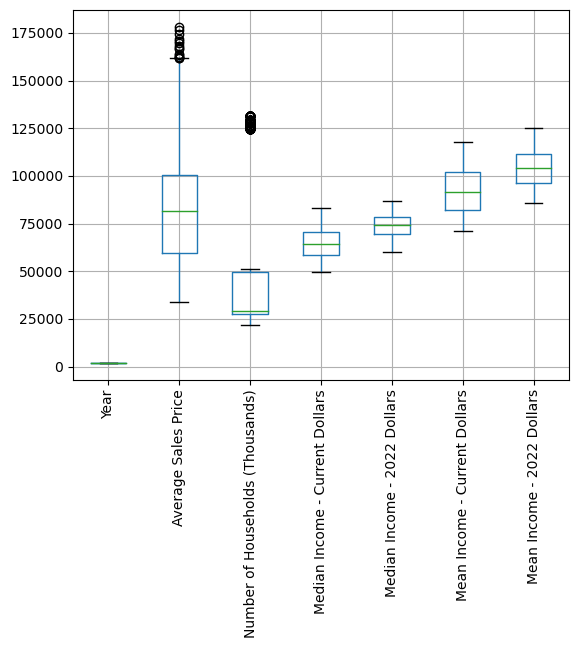

In [28]:
# Detecting outliers using a boxplot
boxplot=df.boxplot(column=["Year","Average Sales Price","Number of Households (Thousands)","Median Income - Current Dollars","Median Income - 2022 Dollars","Mean Income - Current Dollars","Mean Income - 2022 Dollars"]) 
plt.xticks(rotation=90)
plt.show()

We can see that there are some outliers in the Average Sales Price and Number of Households (Thousands). 

In [29]:
# Droping outliers
from scipy import stats 
z = np.abs(stats.zscore(df['Average Sales Price'])) 
t = np.abs(stats.zscore(df['Number of Households (Thousands)'])) 

In [30]:
#Threshold will be taken from empirical rule
np.where(z > 3)  
np.where(t > 3)

(array([], dtype=int64),)

In [31]:
df_new=df.drop(list(np.where((z > 3) | (t > 3))[0]))
df_new 

,Year,Month,Region,Home Size,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars
0,2022,December,Midwest,Double,144300.0,28280.0,73070.0,73070.0,102400.0,102400.0
1,2022,December,Midwest,Single,82300.0,28280.0,73070.0,73070.0,102400.0,102400.0
2,2022,December,Midwest,Total1,104700.0,28280.0,73070.0,73070.0,102400.0,102400.0
3,2022,December,Northeast,Double,158300.0,22630.0,80360.0,80360.0,115300.0,115300.0
4,2022,December,Northeast,Single,75300.0,22630.0,80360.0,80360.0,115300.0,115300.0
...,...,...,...,...,...,...,...,...,...,...
1570,2014,January,United States,Single,48000.0,124600.0,53660.0,64900.0,75740.0,91610.0
1571,2014,January,United States,Total1,68300.0,124600.0,53660.0,64900.0,75740.0,91610.0
1572,2014,January,West,Double,93900.0,27910.0,57690.0,69780.0,79610.0,96300.0
1573,2014,January,West,Single,55400.0,27910.0,57690.0,69780.0,79610.0,96300.0


#### Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
encoder = LabelEncoder()

# Encode each categorical column
df_new['Month_Encoded'] = encoder.fit_transform(df_new['Month'])
df_new['Region_Encoded'] = encoder.fit_transform(df_new['Region'])
df_new['Home Size_Encoded'] = encoder.fit_transform(df_new['Home Size'])

# Drop the original categorical columns
df_new.drop(columns=['Month', 'Region', 'Home Size'], inplace=True)

df_new.head()

,Year,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars,Month_Encoded,Region_Encoded,Home Size_Encoded
0,2022,144300.0,28280.0,73070.0,73070.0,102400.0,102400.0,2,0,0
1,2022,82300.0,28280.0,73070.0,73070.0,102400.0,102400.0,2,0,1
2,2022,104700.0,28280.0,73070.0,73070.0,102400.0,102400.0,2,0,2
3,2022,158300.0,22630.0,80360.0,80360.0,115300.0,115300.0,2,1,0
4,2022,75300.0,22630.0,80360.0,80360.0,115300.0,115300.0,2,1,1


#### Converting non numeric values to numeric values

In [33]:
import pandas as pd
from word2number import w2n  

# Identify the column(s) causing the error
numerical_cols = ['Year','Average Sales Price', 'Number of Households (Thousands)', 'Median Income - Current Dollars','Median Income - 2022 Dollars', 'Mean Income - Current Dollars', 'Mean Income - 2022 Dollars']  # Replace with actual column names (if known)

# Function to handle non-numeric conversion
def handle_non_numeric(df_new, col):
    try:
        # Attempt conversion to numeric 
        df_new[col] = pd.to_numeric(df_new[col])
    except pd.api.types.errors.ConversionError:
        # Handle non-numeric values using word2num 
        print(f"Warning: Non-numeric values found in column '{col}'.")
        for idx, value in df_new[col].iteritems():
            try:
                # Convert number words to numeric using word2num
                df_new.loc[idx, col] = w2n.word_to_num(value)
            except ValueError:
                # Handle cases where word2num fails 
                print(f"Error converting '{value}' in column '{col}'. Consider removing or imputing.")

# Apply the function to each column
for col in numerical_cols:
    handle_non_numeric(df_new.copy(), col) 

### Exploratory Data Analysis

In [34]:
df_num = df_new.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Year,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars
0,2022,144300.0,28280.0,73070.0,73070.0,102400.0,102400.0
1,2022,82300.0,28280.0,73070.0,73070.0,102400.0,102400.0
2,2022,104700.0,28280.0,73070.0,73070.0,102400.0,102400.0
3,2022,158300.0,22630.0,80360.0,80360.0,115300.0,115300.0
4,2022,75300.0,22630.0,80360.0,80360.0,115300.0,115300.0


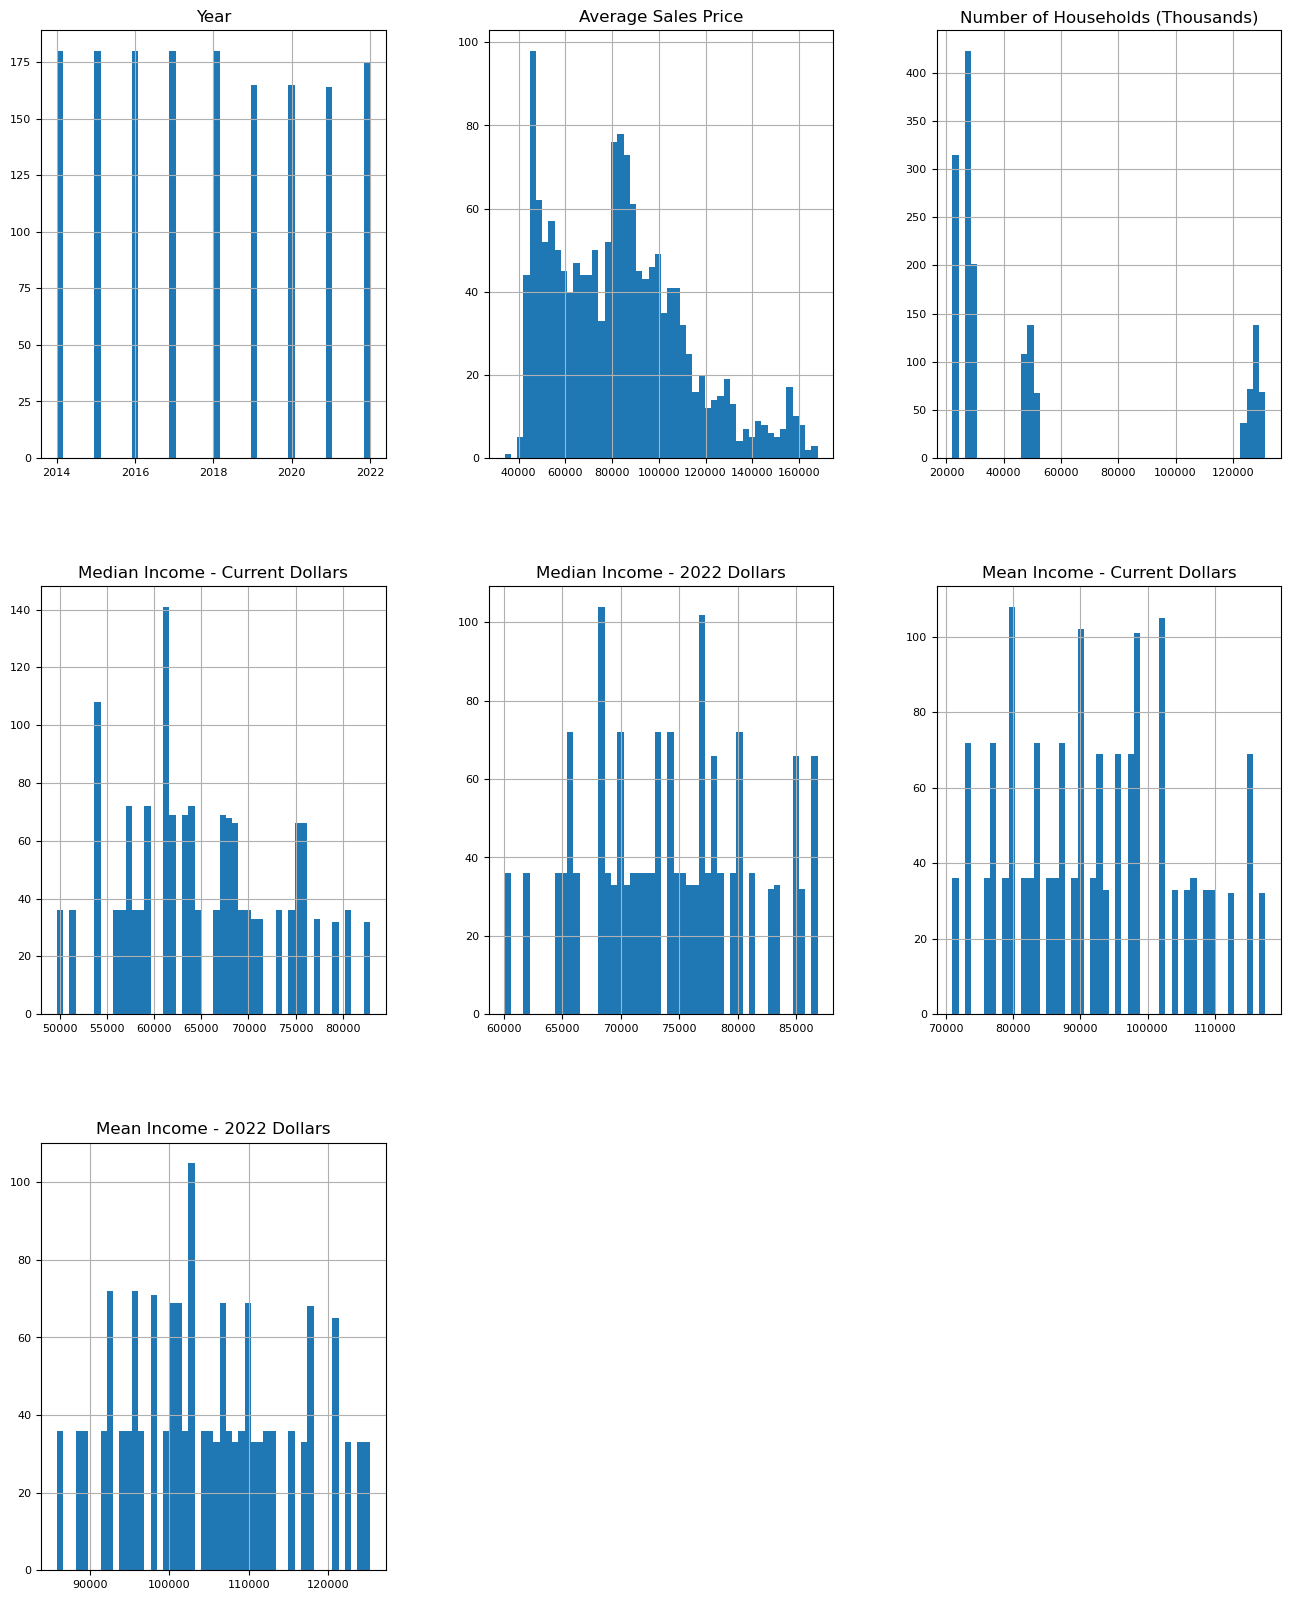

In [35]:
# Plot the distribution for all the numerical features
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

Median income is often more relevant becouse it reflects the income level of the "average" person in a region, which is more relevant to understanding whether typical residents can afford the average sales price in their area.

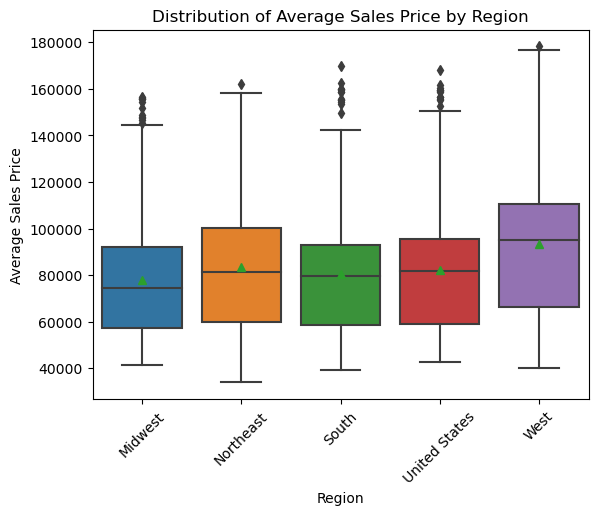

In [36]:
import seaborn as sns

# Create a box plot using seaborn
sns.boxplot(
    x = "Region",  
    y = "Average Sales Price", 
    showmeans=True,  # outliers with a diamond marker
    data=df
)

plt.xlabel('Region')
plt.ylabel('Average Sales Price')
plt.title('Distribution of Average Sales Price by Region')
plt.xticks(rotation=45)  

plt.show()

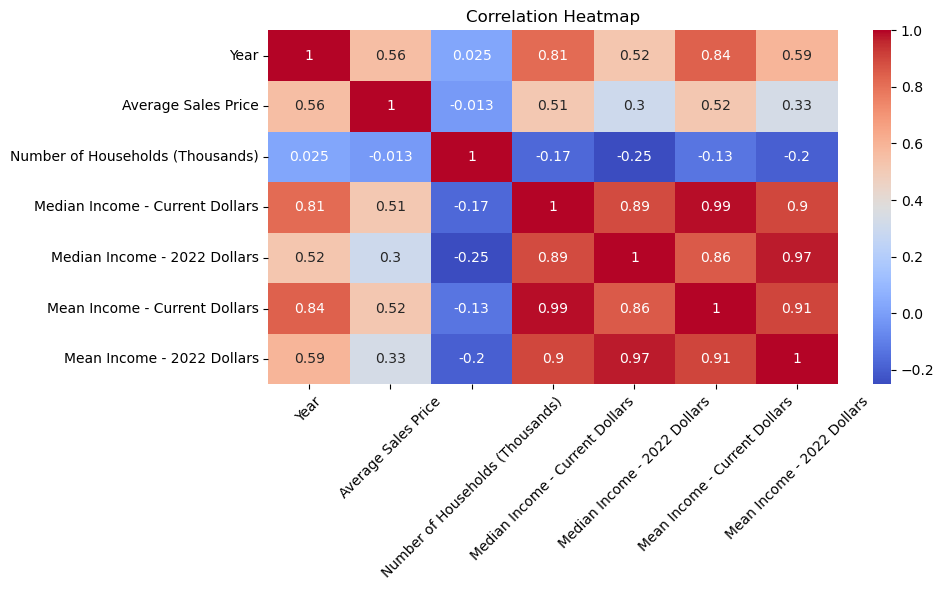

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  
plt.title('Correlation Heatmap')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

We can observe that other features are not much correlate with Average sales price feature. But Median Income - Current Dollars and Mean Income - Current Dollars features are somewhat correlate with the Average sales price.

#### Plotting average sales price over time across all regions and home sizes

In [39]:
import calendar

# Convert 'Month' to numeric values using calendar module
df['Month'] = df['Month'].apply(lambda x: list(calendar.month_name).index(x))

# Convert 'Year' and 'Month' columns to strings and then concatenate them
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str).str.zfill(2)  # Zero padding for single-digit months
df['Date'] = df['Year'] + '-' + df['Month']

# Convert the concatenated strings to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

df['Date']

0      2022-12-01
1      2022-12-01
2      2022-12-01
3      2022-12-01
4      2022-12-01
          ...    
1570   2014-01-01
1571   2014-01-01
1572   2014-01-01
1573   2014-01-01
1574   2014-01-01
Name: Date, Length: 1575, dtype: datetime64[ns]

In [41]:
import altair as alt

chart = alt.Chart(df).mark_line().encode(
    x=alt.X('Date:T', timeUnit='yearmonthdate', axis=alt.Axis(title='Date')),
    y=alt.Y('Average Sales Price', axis=alt.Axis(title='Average Sales Price')),
).properties(
    width=300, 
    height=200  
)

# Adding semantic zooming
zoom = alt.selection_interval(bind='scales', encodings=['x'])

# Apply the selection
chart = chart.add_params(zoom).transform_filter(
    zoom
)

# Encoding faceted rows for region and faceted columns for home size
chart = chart.facet(
    row=alt.Row('Region:N', title='Region'), 
    column=alt.Column('Home Size:N', title='Home Size')
)

chart

alt.FacetChart(...)

We can observe an overall increase in average sales price over time across all regions and home sizes. This increase seems to be the largest in the Western and Southern regions for duplex (double) properties. This connotes a higher demand for duplex properties in these regions. This may signal a shift in home buying behavior from owner-occupied home buying to investor home buying.